# Business understanding
Goal is to segment customers based on their income and spending habits. This will help the marketing team target the right customers with the right products.

## Ehdotuksia:

**Jos löytyy energiaa osallistua, niin tota tehtävänannon kysymyksen asettelua vois vielä pohtia lisää, eli yritetään keksiä mitä kaikkea tosta saa kaivettua esiin..**

- Jos ymmärsin datan oikein toi amoutspent on vaa rahan määrä. Olisko kiinnostavaa tutkia kuinka suuren osan tuloista käyttää eri tuoteryhmiin?
- Erilaisia suhteita muuttujien välillä assosiaation avulla esim. liittyykö lapsien määrä karkin oston määrään, minkä ikäset ostaa eniten viiniä jne
- Vaikuttaako tulojen määrä promootioihin osallistumiseen?
- Minkälaista porukkaa käyttää nettikauppaa vs katalogia vs kauppaa?

## Data Understanding


### People
**Basic information about the customer.**
- Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


### Products
**Information about the amount spent on product groups by a customer.**
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


### Promotion
**Information about the customer's promotion participation.**
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


### Place
**Information about the location of the customer's activity.**
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


## Data Preparation

In [66]:
import pandas  as pd
df = pd.read_csv('data/marketing_campaign.csv', sep='\t')
df['TotalSpent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["Age"] = 2025 - df["Year_Birth"]
df.drop(['ID'] , axis=1, inplace=True)
df = df.dropna()

df = df[~df["Marital_Status"].isin(["Absurd", "YOLO"])]
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone'],
      dtype=object)

In [67]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1

Income_outliers = df[df.Income > Q3 + 1.5*IQR]
df = df[df.Income < Q3 + 1.5*IQR]
Income_outliers.head(10)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,...,0,0,0,0,0,3,11,0,1608,52
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,...,0,0,0,0,0,3,11,0,107,49
655,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,...,0,0,0,0,0,3,11,0,6,50
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,...,0,0,0,0,0,3,11,0,1717,43
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,...,0,0,0,0,0,3,11,0,59,54
1653,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,...,0,0,0,0,0,3,11,0,1730,48
2132,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,...,0,0,0,0,0,3,11,0,8,76
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,...,0,0,0,0,0,3,11,0,62,48


In [68]:
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3 - Q1

Age_outliers = df[df.Age > Q3 + 1.5*IQR]
df = df[df.Age < Q3 + 1.5*IQR]
Age_outliers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age
192,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,...,0,0,0,0,1,3,11,0,65,125
239,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,...,0,0,0,0,0,3,11,0,22,132
339,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,...,0,1,0,0,0,3,11,0,1853,126


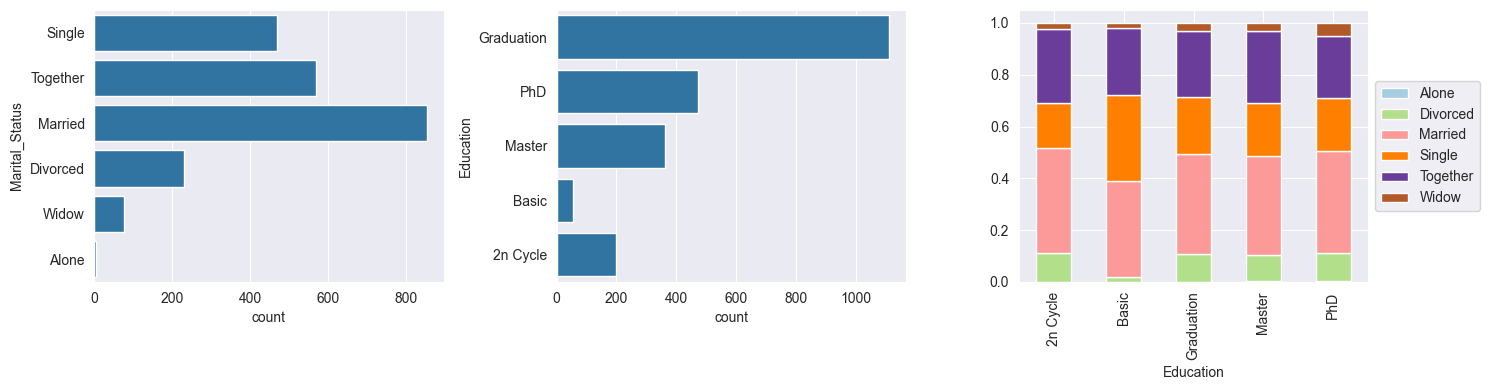

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
# Taking a look at the categorical variables
fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.countplot(df['Marital_Status'], ax=ax[0])
sns.countplot(df['Education'], ax=ax[1])
df_plot = df.groupby(['Marital_Status', 'Education']).size().reset_index().pivot(columns='Marital_Status', index='Education', values=0,)
df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, ax=ax[2],  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
# Heittää warningia, toimii (?) näemmä ilmanki
#fig.show()

In [70]:
features = ["Income"]
features_spent = ["TotalSpent"]
X_continuous = df[features]

## Data Modeling

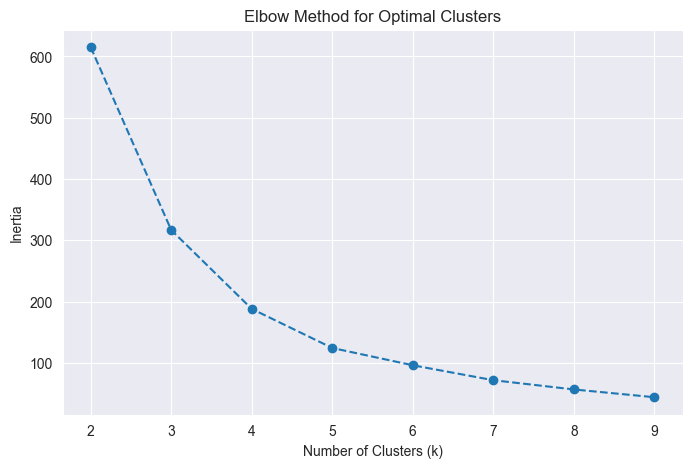

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_continuous)
# Convert back to DataFrame
X_scaled = pd.DataFrame(X_continuous_scaled, columns=features)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
    
    

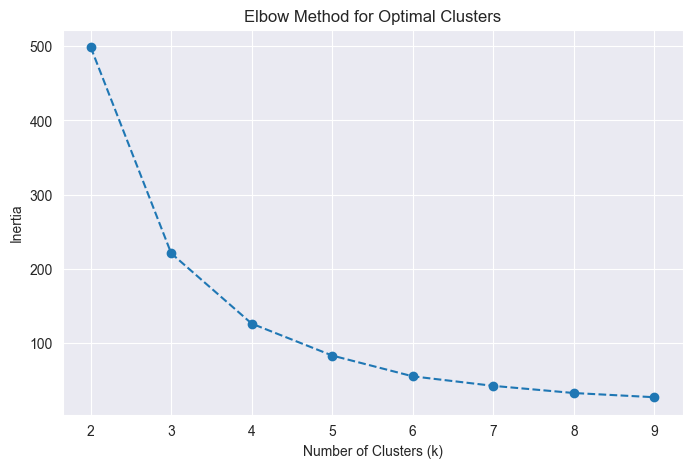

In [72]:
X_spent = df[features_spent]
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X_spent)
# Convert back to DataFrame
X_scaled_spent = pd.DataFrame(X_continuous_scaled, columns=features_spent)



inertia = []
K_range = range(2, 10) 

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled_spent)
    inertia.append(model.inertia_)  

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

In [73]:
model = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled)
model_spent = KMeans(init='random', n_clusters=4, random_state=42).fit(X_scaled_spent)
X_scaled['Cluster'] = model.labels_
X_scaled['Cluster'].value_counts()


Cluster
0    648
2    616
1    488
3    449
Name: count, dtype: int64

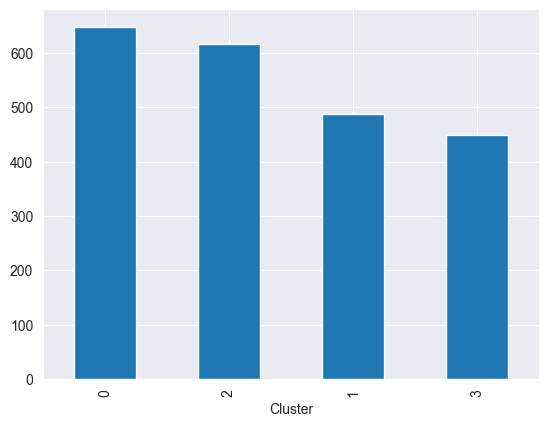

In [74]:
X_scaled['Cluster'].value_counts().plot(kind='bar');

In [75]:

X_scaled.groupby('Cluster').mean()

,Income
Cluster,
0,-0.489690
1,1.348642
2,0.447650
3,-1.373209


In [76]:
from sklearn.metrics import silhouette_score
# Compute Silhouette Score
silhouette = silhouette_score(X_scaled, model.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette:.2f}")

Silhouette Score for 3 clusters: 0.80


In [77]:
silhouette_score = silhouette_score(X_scaled_spent, model_spent.labels_)
print(f"Silhouette Score for 3 clusters: {silhouette_score:.2f}")

Silhouette Score for 3 clusters: 0.65


In [78]:
df["Cluster"] = model.fit_predict(X_scaled)
df["SpendingCluster"] = model_spent.fit_predict(X_scaled_spent)
#mean of all clusters
df.groupby("Cluster")["Income"].mean()


Cluster
0    60879.873377
1    79545.260246
2    41461.495370
3    23158.097996
Name: Income, dtype: float64

In [79]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1122.274123
1     576.370283
2    1768.423221
3     101.045541
Name: TotalSpent, dtype: float64

## Results Evaluation

In [80]:
# Assign cluster labels dynamically
income_means = df.groupby("Cluster")["Income"].mean().sort_values()
spending_means = df.groupby("SpendingCluster")["TotalSpent"].mean().sort_values()

# Create mapping dictionaries
income_labels = {income_means.index[0]: "Poor", 
                 income_means.index[1]: "Medium Income", 
                 income_means.index[2]: "High Income", 
                 income_means.index[3]: "Rich"}

spending_labels = {spending_means.index[0]: "Low Spender", 
                   spending_means.index[1]: "Medium Spender", 
                   spending_means.index[2]: "High Spender", 
                   spending_means.index[3]: "Very High Spender"}

df["IncomeCategory"] = df["Cluster"].map(income_labels)
df["SpendingHabits"] = df["SpendingCluster"].map(spending_labels)

In [81]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster,IncomeCategory,SpendingHabits
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,3,11,1,1617,68,0,2,High Income,Very High Spender
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,3,11,0,27,71,2,3,Medium Income,Low Spender
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,3,11,0,776,60,1,1,Rich,Medium Spender
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,3,11,0,53,41,3,3,Poor,Low Spender
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,3,11,0,422,44,0,1,High Income,Medium Spender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,0,3,11,0,1341,58,0,0,High Income,High Spender
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,0,3,11,0,444,79,0,1,High Income,Medium Spender
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,0,3,11,0,1241,44,0,0,High Income,High Spender
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,0,3,11,0,843,69,0,1,High Income,Medium Spender


In [82]:
df_poor = df[df["IncomeCategory"] == "Poor"]
df_rich = df[df["IncomeCategory"] == "Rich"]
df_high_income = df[df["IncomeCategory"] == "High Income"]
df_medium_income = df[df["IncomeCategory"] == "Medium Income"]

In [83]:
features_to_plot = ["MntWines","TotalSpent" ,"MntGoldProds"]
df_high_income.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,...,616.000000,616.000000,616.000000,616.0,616.0,616.000000,616.000000,616.000000,616.0,616.000000
mean,1965.918831,60879.873377,0.225649,0.777597,48.639610,450.725649,31.922078,175.613636,43.024351,30.323052,...,0.032468,0.017857,0.008117,3.0,11.0,0.103896,791.034091,59.081169,0.0,1.060065
std,10.831446,5454.254499,0.451978,0.494738,28.095192,291.085383,40.795430,160.509524,53.486548,37.583700,...,0.177382,0.132540,0.089800,0.0,0.0,0.305374,433.600367,10.831446,0.0,1.065938
min,1943.000000,51195.000000,0.000000,0.000000,0.000000,5.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,16.000000,33.000000,0.0,0.000000
25%,1957.000000,56129.000000,0.000000,0.000000,25.000000,224.000000,4.000000,64.750000,6.000000,4.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,454.750000,51.000000,0.0,0.000000
50%,1966.000000,61216.000000,0.000000,1.000000,50.000000,398.000000,16.000000,128.000000,20.000000,14.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,784.000000,59.000000,0.0,1.000000
75%,1974.000000,65487.250000,0.000000,1.000000,72.000000,623.500000,44.250000,237.250000,63.000000,44.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1071.250000,68.000000,0.0,2.000000
max,1992.000000,70179.000000,2.000000,2.000000,99.000000,1459.000000,199.000000,849.000000,259.000000,192.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2440.000000,82.000000,0.0,3.000000


In [84]:
df_rich.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,488.000000,488.000000,488.00000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,...,488.000000,488.000000,488.000000,488.0,488.0,488.000000,488.000000,488.000000,488.0,488.000000
mean,1967.680328,79545.260246,0.07582,0.264344,49.754098,650.155738,63.008197,445.096311,90.643443,68.032787,...,0.239754,0.030738,0.004098,3.0,11.0,0.288934,1390.547131,57.319672,1.0,1.008197
std,12.852674,6867.388066,0.27262,0.472877,29.366637,329.280979,49.095389,234.701858,65.848778,53.209621,...,0.427371,0.172783,0.063953,0.0,0.0,0.453733,440.233476,12.852674,0.0,0.952644
min,1941.000000,70287.000000,0.00000,0.000000,0.000000,6.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,277.000000,30.000000,1.0,0.000000
25%,1957.000000,74241.000000,0.00000,0.000000,25.000000,393.750000,24.000000,258.500000,38.000000,26.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1078.750000,48.000000,1.0,0.000000
50%,1968.000000,78574.000000,0.00000,0.000000,52.000000,604.000000,48.000000,415.000000,75.000000,53.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1378.500000,57.000000,1.0,1.000000
75%,1977.000000,83146.500000,0.00000,0.250000,74.250000,899.500000,96.250000,602.500000,137.000000,103.000000,...,0.000000,0.000000,0.000000,3.0,11.0,1.000000,1690.250000,68.000000,1.0,2.000000
max,1995.000000,113734.000000,2.00000,2.000000,99.000000,1493.000000,197.000000,984.000000,258.000000,262.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2525.000000,84.000000,1.0,3.000000


<Figure size 1200x600 with 0 Axes>

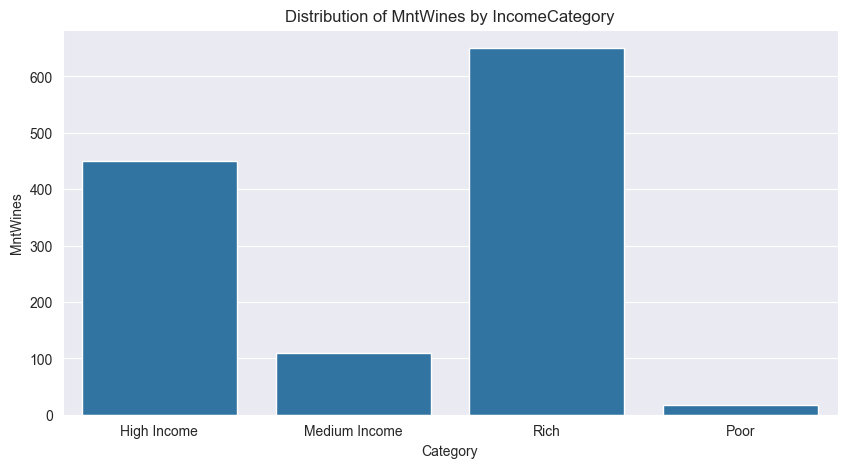

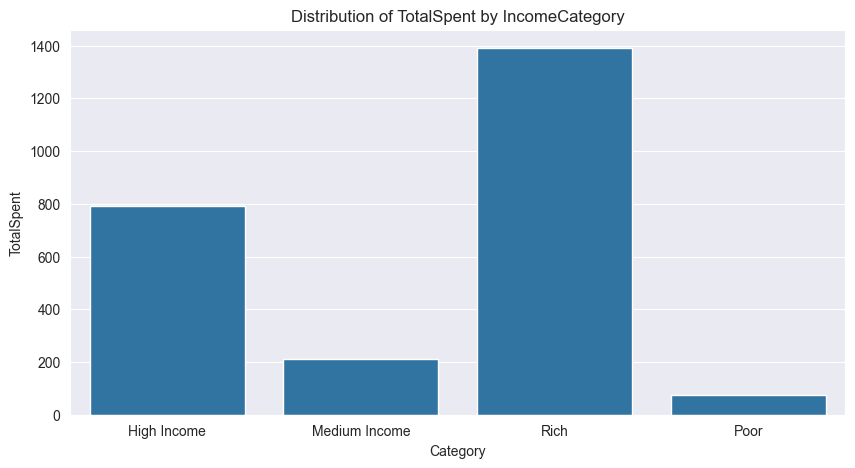

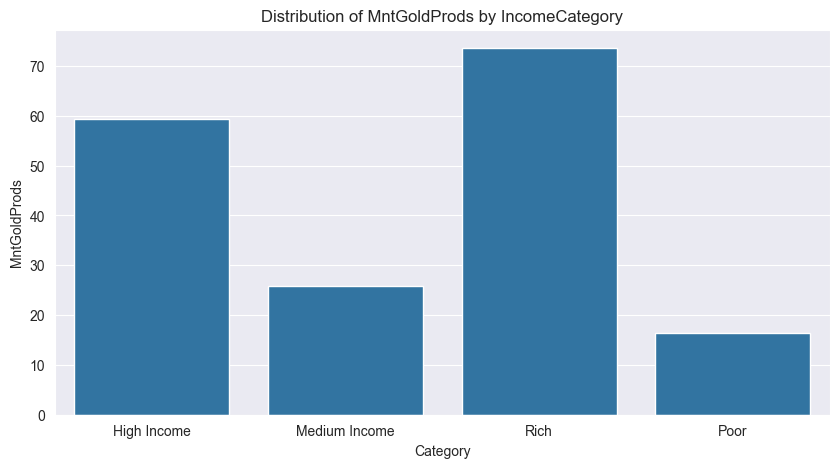

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is called df and has a column 'Category' (e.g., "rich" and "poor")
plt.figure(figsize=(12, 6))

for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df["IncomeCategory"], y=df[feature],errorbar=None)
    plt.title(f"Distribution of {feature} by IncomeCategory")
    plt.xlabel("Category")
    plt.ylabel(feature)
    plt.show()

In [86]:
df.groupby("SpendingCluster")["TotalSpent"].mean()

SpendingCluster
0    1122.274123
1     576.370283
2    1768.423221
3     101.045541
Name: TotalSpent, dtype: float64

In [87]:

pd.crosstab(df["SpendingHabits"], df["IncomeCategory"])


IncomeCategory,High Income,Medium Income,Poor,Rich
SpendingHabits,,,,
High Spender,226,14,0,216
Low Spender,106,507,438,3
Medium Spender,233,126,10,55
Very High Spender,51,1,1,214


In [88]:
df[(df["SpendingHabits"] == "High Spender")].describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotalSpent,Age,Cluster,SpendingCluster
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,...,456.000000,456.000000,456.000000,456.0,456.0,456.000000,456.000000,456.000000,456.000000,456.0
mean,1966.118421,69558.515351,0.067982,0.495614,49.320175,564.458333,52.396930,299.640351,74.447368,54.668860,...,0.100877,0.024123,0.008772,3.0,11.0,0.164474,1122.274123,58.881579,0.535088,0.0
std,12.347141,10056.914814,0.251992,0.542666,28.214456,237.663328,47.860079,167.268390,63.769894,49.896398,...,0.301497,0.153599,0.093349,0.0,0.0,0.371112,165.168969,12.347141,0.557543,0.0
min,1943.000000,44802.000000,0.000000,0.000000,0.000000,123.000000,0.000000,45.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,850.000000,30.000000,0.000000,0.0
25%,1956.000000,62845.000000,0.000000,0.000000,25.750000,384.000000,17.000000,165.750000,21.000000,13.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,978.000000,50.000000,0.000000,0.0
50%,1966.000000,69757.000000,0.000000,0.000000,52.500000,539.500000,36.000000,259.000000,58.500000,38.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1110.500000,59.000000,1.000000,0.0
75%,1975.000000,76877.000000,0.000000,1.000000,72.000000,725.000000,77.500000,407.250000,113.000000,87.000000,...,0.000000,0.000000,0.000000,3.0,11.0,0.000000,1246.250000,69.000000,1.000000,0.0
max,1995.000000,102692.000000,1.000000,2.000000,99.000000,1241.000000,199.000000,899.000000,259.000000,195.000000,...,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1445.000000,82.000000,2.000000,0.0


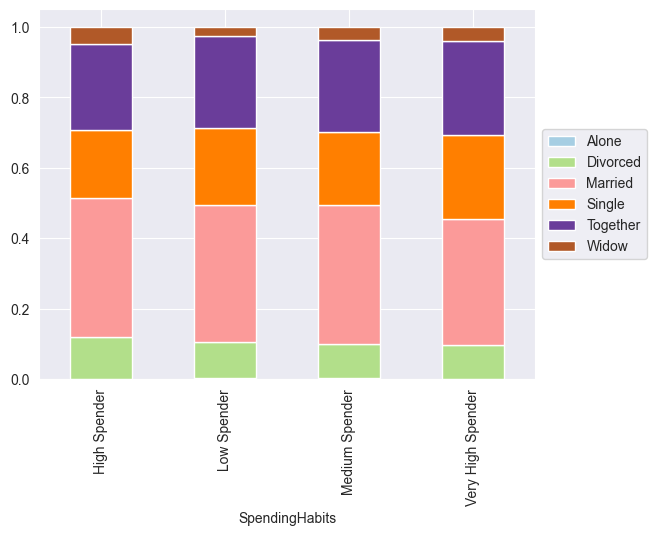

In [89]:

df_plot = df.groupby(['Marital_Status', 'SpendingHabits']).size().reset_index(name='Count')
df_plot = df_plot.pivot(columns='Marital_Status', index='SpendingHabits', values='Count')

df_plot.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True,  colormap='Paired')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

In [90]:
print(model.cluster_centers_.shape)

(4, 2)


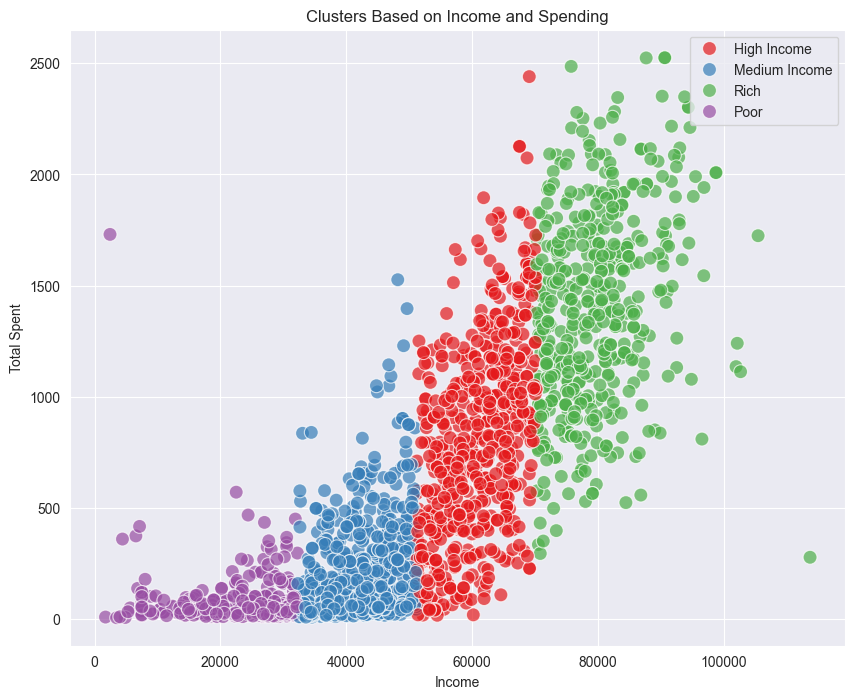

In [91]:

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=df["Income"], y=df["TotalSpent"], hue=df["IncomeCategory"],palette="Set1", s=100, alpha=0.7)


plt.xlabel("Income")
plt.ylabel("Total Spent")
plt.title("Clusters Based on Income and Spending")
plt.legend()
plt.show()


In [92]:
df.groupby("SpendingHabits")[["MntWines","MntMeatProducts","MntSweetProducts",'MntFruits', "MntGoldProds"]].mean()

,MntWines,MntMeatProducts,MntSweetProducts,MntFruits,MntGoldProds
SpendingHabits,,,,,
High Spender,564.458333,299.640351,54.668860,52.396930,76.662281
Low Spender,45.408918,23.517078,5.391841,4.999051,14.589184
Medium Spender,312.438679,120.455189,24.443396,24.797170,59.148585
Very High Spender,883.932584,566.636704,70.318352,68.794007,79.550562


In [93]:
df.groupby("SpendingHabits")["NumDealsPurchases"].mean()

SpendingHabits
High Spender         2.245614
Low Spender          2.122391
Medium Spender       3.419811
Very High Spender    1.449438
Name: NumDealsPurchases, dtype: float64

# TESTEJÄ JA EHDOTUKSIA

In [94]:
# Apriorissa ongelma että pitää olla binary arvot 
# Vaan 186 alle 40v pitäs varmaan muuttaa
# Voi olla että ihan turha tehä tämmöstä
# Pitäs keksiä enemmän binääriarvoja
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

print(df['MntWines'].mean())
print(df['MntFruits'].mean())
print(df['MntMeatProducts'].mean())
print(df['MntFishProducts'].mean())
print(df['MntSweetProducts'].mean())
print(df['MntGoldProds'].mean())
mutable_df = df
mutable_df['above_average_wine'] = df['MntWines'].mean() < df['MntWines']
mutable_df['over_40'] = 2025 - df['Year_Birth'] > 40
mutable_df['under_average_wine'] = df['MntWines'].mean() > df['MntWines']
mutable_df['under_40'] = 2025 - df['Year_Birth'] < 40
mutable_df.head(10)
new = mutable_df.filter(['above_average_wine', 'over_40', 'under_average_wine', 'under_40'], axis = 1)
freq = apriori(new, min_support=0.01, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0)
rules.sort_values(by='support', ascending=False)

306.1054066333485
26.371649250340756
165.28305315765562
37.634711494775104
27.147205815538392
43.91367560199909


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(over_40),(under_average_wine),0.900954,0.613358,0.545207,0.605144,0.986608,1.0,-0.007400,0.979198,-0.120524,0.562588,-0.021244,0.747016
4,(under_average_wine),(over_40),0.613358,0.900954,0.545207,0.888889,0.986608,1.0,-0.007400,0.891413,-0.033915,0.562588,-0.121814,0.747016
0,(above_average_wine),(over_40),0.386642,0.900954,0.355747,0.920094,1.021244,1.0,0.007400,1.239530,0.033915,0.381765,0.193243,0.657475
1,(over_40),(above_average_wine),0.900954,0.386642,0.355747,0.394856,1.021244,1.0,0.007400,1.013573,0.210025,0.381765,0.013392,0.657475
6,(under_average_wine),(under_40),0.613358,0.084507,0.056338,0.091852,1.086914,1.0,0.004505,1.008088,0.206816,0.087819,0.008023,0.379259
7,(under_40),(under_average_wine),0.084507,0.613358,0.056338,0.666667,1.086914,1.0,0.004505,1.159927,0.087345,0.087819,0.137877,0.379259
3,(under_40),(above_average_wine),0.084507,0.386642,0.028169,0.333333,0.862123,1.0,-0.004505,0.920036,-0.148711,0.063590,-0.086914,0.203094
2,(above_average_wine),(under_40),0.386642,0.084507,0.028169,0.072855,0.862123,1.0,-0.004505,0.987433,-0.206816,0.063590,-0.012727,0.203094


In [95]:
# Päätelmiä:
# 54% yli 40v ostaa alle keskimäärän viiniä
# 2% alle 40v ostaa yli keskimäärän viiniä
# etc

In [96]:
print(mutable_df['NumWebPurchases'].mean())
print(mutable_df['NumCatalogPurchases'].mean())
print(mutable_df['NumStorePurchases'].mean())
print(mutable_df['NumWebVisitsMonth'].mean())
mutable_df['above_average_web'] = mutable_df['NumWebPurchases'].mean() < mutable_df['NumWebPurchases']
mutable_df['above_average_cat'] = mutable_df['NumCatalogPurchases'].mean() < mutable_df['NumCatalogPurchases']
mutable_df['above_average_store'] = mutable_df['NumStorePurchases'].mean() < mutable_df['NumStorePurchases']
mutable_df['under_average_web'] = mutable_df['NumWebPurchases'].mean() > mutable_df['NumWebPurchases']
mutable_df['under_average_cat'] = mutable_df['NumCatalogPurchases'].mean() > mutable_df['NumCatalogPurchases']
mutable_df['under_average_store'] = mutable_df['NumStorePurchases'].mean() > mutable_df['NumStorePurchases']
new = mutable_df.filter(['above_average_web', 'over_40', 'above_average_cat', 'under_40', 'above_average_store',
                        'under_average_web', 'under_average_cat', 'under_average_store'], axis = 1)
freq = apriori(new, min_support=0.4, use_colnames = True)
rules = association_rules(freq, metric='confidence', min_threshold=0.5)
rules.sort_values(by='support', ascending=False)
# 54% yli 40v ostaa alle keskiarvon kaikista paikoista

4.098591549295775
2.6424352567014995
5.822807814629714
5.338028169014085


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
2,(over_40),(under_average_cat),0.900954,0.605634,0.543844,0.603631,0.996693,1.0,-0.001805,0.994947,-0.032415,0.564889,-0.005079,0.750803
3,(under_average_cat),(over_40),0.605634,0.900954,0.543844,0.897974,0.996693,1.0,-0.001805,0.970795,-0.008344,0.564889,-0.030083,0.750803
0,(over_40),(under_average_web),0.900954,0.618810,0.541572,0.601109,0.971396,1.0,-0.015947,0.955626,-0.229166,0.553646,-0.046434,0.738146
1,(under_average_web),(over_40),0.618810,0.900954,0.541572,0.875184,0.971396,1.0,-0.015947,0.793532,-0.071708,0.553646,-0.260188,0.738146
4,(over_40),(under_average_store),0.900954,0.564743,0.503862,0.559254,0.990279,1.0,-0.004946,0.987545,-0.090169,0.523855,-0.012612,0.725725
5,(under_average_store),(over_40),0.564743,0.900954,0.503862,0.892196,0.990279,1.0,-0.004946,0.918761,-0.022055,0.523855,-0.088422,0.725725
10,(under_average_store),(under_average_cat),0.564743,0.605634,0.477510,0.845535,1.396116,1.0,0.135483,2.553110,0.651862,0.689180,0.608321,0.816991
11,(under_average_cat),(under_average_store),0.605634,0.564743,0.477510,0.788447,1.396116,1.0,0.135483,2.057437,0.719451,0.689180,0.513958,0.816991
6,(under_average_web),(under_average_cat),0.618810,0.605634,0.472967,0.764317,1.262012,1.0,0.098195,1.673292,0.544648,0.629383,0.402376,0.772631
7,(under_average_cat),(under_average_web),0.605634,0.618810,0.472967,0.780945,1.262012,1.0,0.098195,1.740160,0.526451,0.629383,0.425340,0.772631


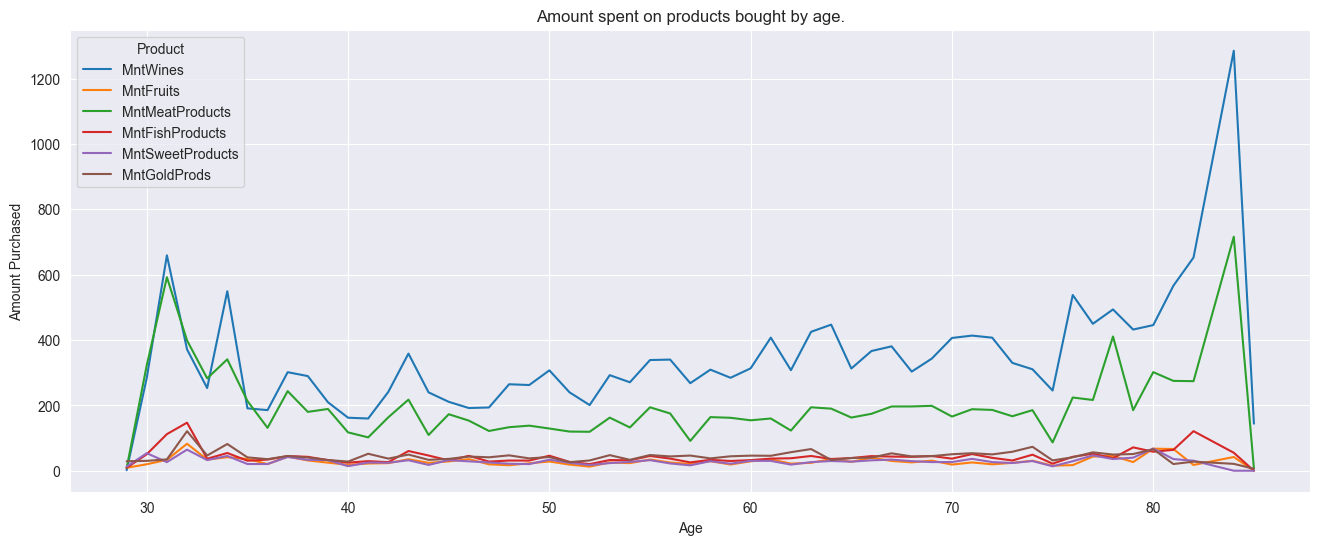

In [97]:
# Hahmottaa tuotteiden ostoa iän suhteen
mutable_df['Age'] = 2025 - mutable_df['Year_Birth']
products_long = pd.melt(mutable_df, id_vars=['Age'], 
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Age', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by age.')
plt.xlabel('Age')
plt.ylabel('Amount Purchased')

plt.legend(title='Product')
plt.show()

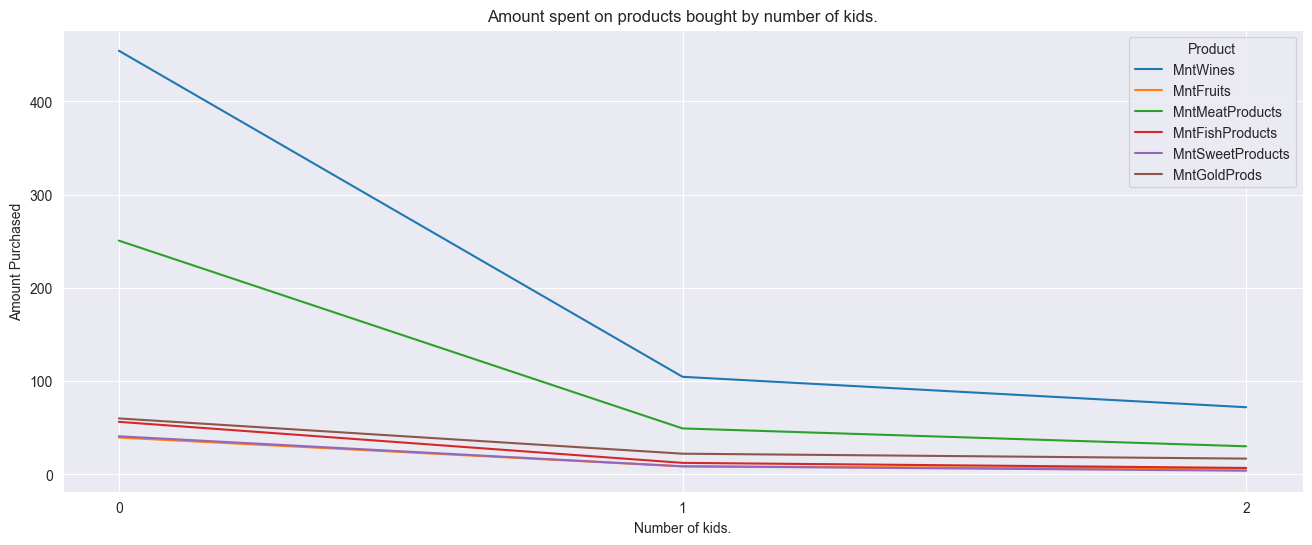

In [98]:
products_long = pd.melt(mutable_df, id_vars=['Kidhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Kidhome', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by number of kids.')
plt.xlabel('Number of kids.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Kidhome'].min(), products_long['Kidhome'].max() + 1)))

plt.legend(title='Product')
plt.show()

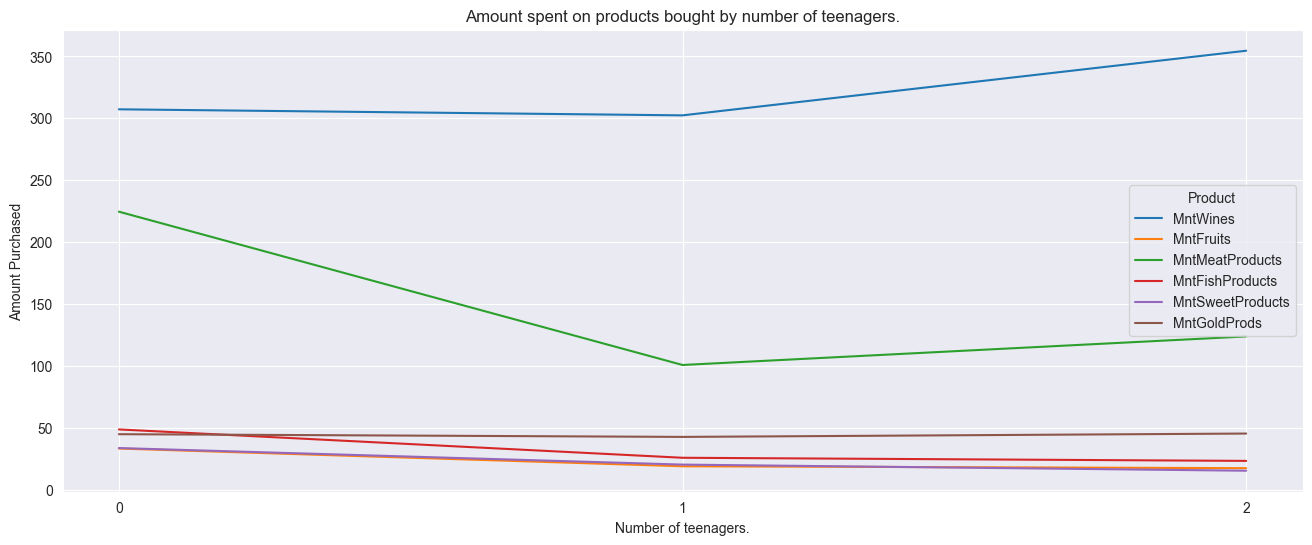

In [99]:
products_long = pd.melt(mutable_df, id_vars=['Teenhome'],
                       value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                       var_name='Product', value_name='Amount')
plt.figure(figsize=(16, 6))

sns.lineplot(data=products_long, x='Teenhome', y='Amount', hue='Product', errorbar=None)

plt.title('Amount spent on products bought by number of teenagers.')
plt.xlabel('Number of teenagers.')
plt.ylabel('Amount Purchased')
plt.xticks(list(range(products_long['Teenhome'].min(), products_long['Teenhome'].max() + 1)))

plt.legend(title='Product')
plt.show()